## import modules 

In [225]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mytools import rankdiag
%matplotlib inline  


In [235]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print "New size:", fig_size

Current size: [6.0, 4.0]
New size: [18, 9]


## Load data

###  true

In [231]:
fname = 'state_true.nc'
fh = Dataset(fname, mode='r')
hfilt = fh.variables['Hfil'][:,:,:]
fh.close()

In [232]:
fname = 'state_4dvar.nc'
fh = Dataset(fname, mode='r')
hfila = fh.variables['Hfil'][:,:,:]
fh.close()

In [233]:
fname = 'state_bck.nc'
fh = Dataset(fname, mode='r')
hfilb = fh.variables['Hfil'][:,:,:]
fh.close()

###  4dvar

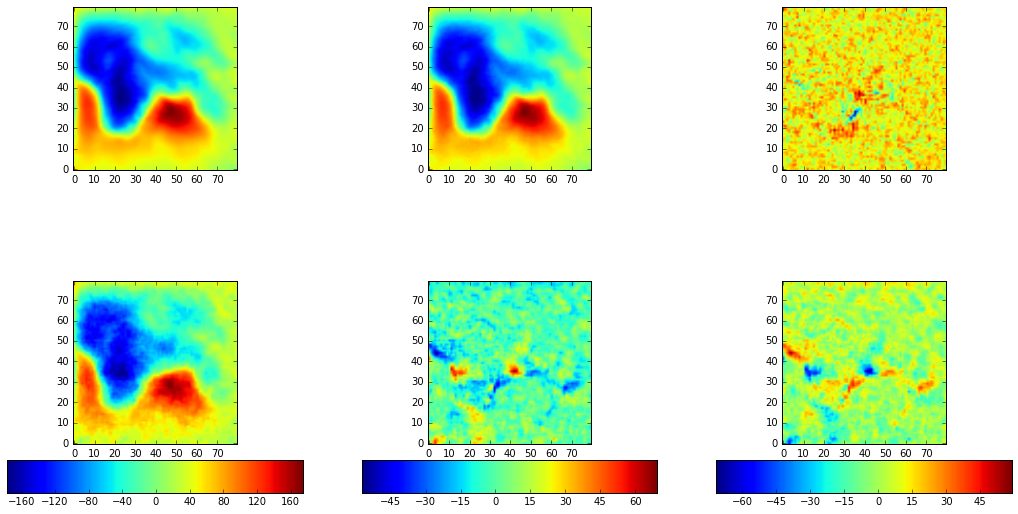

In [168]:
nfig =3
t=1000

fig, ax = plt.subplots(ncols=nfig,nrows=2)
im=np.array(ax)
im[0,0] = ax[0,0].imshow(hfilt[t,:,:])
im[0,1] = ax[0,1].imshow(hfila[t,:,:])
im[0,2] = ax[0,2].imshow(hfila[t,:,:]-hfilt[t,:,:])
im[1,0] = ax[1,0].imshow(hfilb[t,:,:])
im[1,1] = ax[1,1].imshow(hfilt[t,:,:]-hfilb[t,:,:])
im[1,2] = ax[1,2].imshow(hfilb[t,:,:]-hfila[t,:,:])



#plt.subplots_adjust(bottom=0.2)
for (i,j),cax in np.ndenumerate(ax):
    #print i,j
    pos = cax.get_position()
    cax.set_position([pos.x0, pos.y0+0.1, pos.width, pos.height-0.1])
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    #cbar_ax=fig.add_axes([1, pos.y0, 0.05, pos.height])
    plt.colorbar(im[i,j],orientation='horizontal',cax=cbar_ax)
    cax.invert_yaxis()
plt.show()



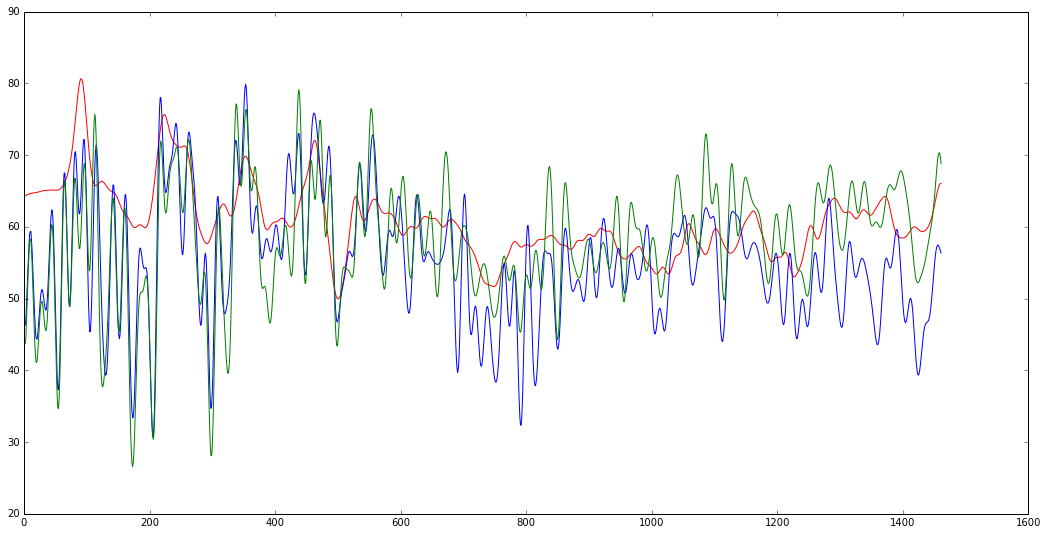

In [243]:
t = range(0,hfilt.shape[0])
x=10
y=40
plt.plot(t,hfilt[:,x,y],color='red')
plt.plot(t,hfila[:,x,y],color='blue')
plt.plot(t,hfilb[:,x,y],color='green')
plt.show()


## Cost function

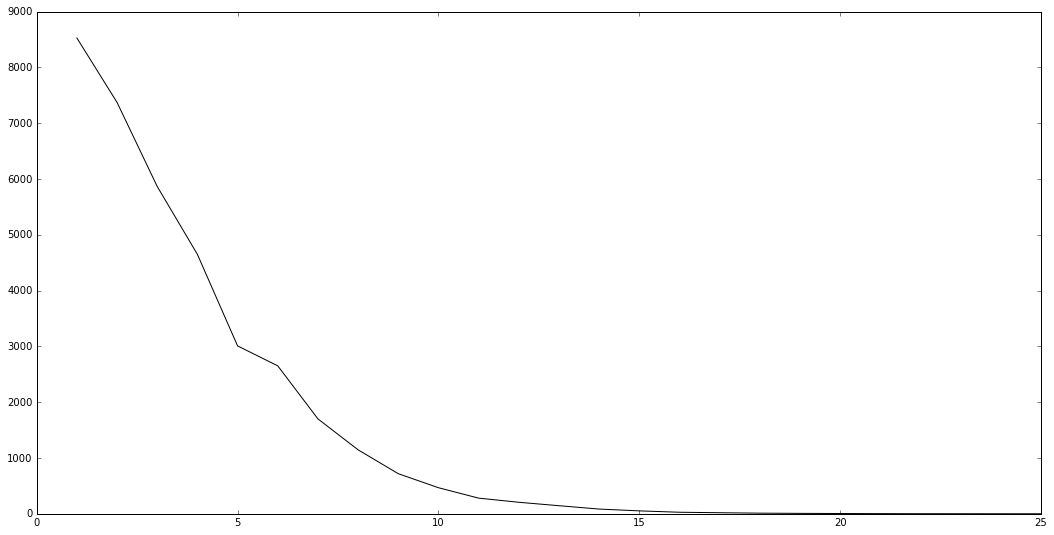

In [242]:
!awk '($1=="m1qn3:" && $6=="f=") {print $3,$7}' tmp > essai
fid = open('essai')
cost=np.array([])
for lignes in fid:
    s = lignes.replace(',',' ')
    s = s.replace('D','E')
    l=s.split()
    nl=np.array([float(l[0]),float(l[1])])
    #print nl
    cost=np.append(cost,nl)
cost.resize((len(cost)/2,2))
plt.plot(cost[:,0],cost[:,1],color='black')

fid.close()


## Rank diagram

In [126]:
#vector xtrue
xt = hfilt.ravel()
xa = hfila.ravel()
xb = hfilb.ravel()

#percentiles
q = range(0,100,10)
v = np.percentile(xt,q)
va = np.zeros(len(q)-1)
vt = np.zeros(len(q)-1)
vb = np.zeros(len(q)-1)

for i in range(0,len(q)-1):
    vt[i]=((v[i] <= xt) & (xt < v[i+1])).sum()
    va[i]=((v[i] <= xa) & (xa < v[i+1])).sum()
    vb[i]=((v[i] <= xb) & (xb < v[i+1])).sum()
    
#add extremes valuers
vt[0]=(xt < v[0]).sum()
vt[-1]=(v[-1] <= xt).sum()

vt[0]=(xt < v[0]).sum()
vt[-1]=(v[-1] <= xt).sum()

vt[0]=(xt < v[0]).sum()
vt[-1]=(v[-1] <= xt).sum()


In [239]:
#vector xtrue
t=-1
xt = hfilt[t,:,:].ravel()
xa = hfila[t,:,:].ravel()
xb = hfilb[t,:,:].ravel()

#percentiles
q = range(0,100,5)
vt = rankdiag(q,xt,xt)
va = rankdiag(q,xt,xa)
vb = rankdiag(q,xt,xb)



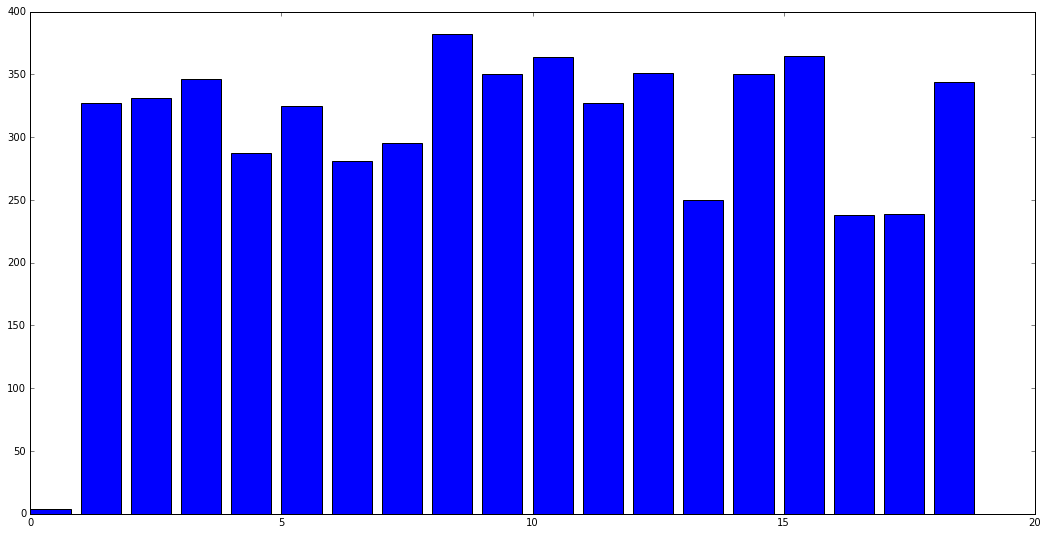

In [241]:
plt.bar(range(len(q)-1),va)
plt.show()